In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#create pandas data frame object
data = pd.read_csv("Crimes_-_2001_to_Present.csv")
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [3]:
#delete duplicated rows
data.drop_duplicates(subset=['Case Number'], inplace=True)

In [4]:
# Convert "Date" column to datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Extract year, month from the data
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month

In [5]:
# restart here
df=data.copy()

In [6]:
df = df[(df['Year'] >= 2003) & (df['Year'] <= 2022)]

In [7]:
df["Day"] = df["Date"].dt.day

In [8]:
primary_type_mapping = {
    'BATTERY': 'Group 1: Violent Crimes',
    'ASSAULT': 'Group 1: Violent Crimes',
    'ROBBERY': 'Group 1: Violent Crimes',
    'SEX OFFENSE': 'Group 1: Violent Crimes',
    'OFFENSE INVOLVING CHILDREN': 'Group 1: Violent Crimes',
    'HOMICIDE': 'Group 1: Violent Crimes',
    'KIDNAPPING': 'Group 1: Violent Crimes',
    'INTIMIDATION': 'Group 1: Violent Crimes',
    'CRIMINAL SEXUAL ASSAULT': 'Group 1: Violent Crimes',
    'CRIM SEXUAL ASSAULT': 'Group 1: Violent Crimes',
    'HUMAN TRAFFICKING': 'Group 1: Violent Crimes',
    
    'THEFT': 'Group 2: Property Crimes',
    'BURGLARY': 'Group 2: Property Crimes',
    'CRIMINAL DAMAGE': 'Group 2: Property Crimes',
    'MOTOR VEHICLE THEFT': 'Group 2: Property Crimes',
    'ARSON': 'Group 2: Property Crimes',
    
    'NARCOTICS': 'Group 3: Drug-Related Crimes',
    'OTHER NARCOTIC VIOLATION': 'Group 3: Drug-Related Crimes',
    
    'PUBLIC PEACE VIOLATION': 'Group 4: Public Order and Nuisance Crimes',
    'PROSTITUTION': 'Group 4: Public Order and Nuisance Crimes',
    'GAMBLING': 'Group 4: Public Order and Nuisance Crimes',
    'LIQUOR LAW VIOLATION': 'Group 4: Public Order and Nuisance Crimes',
    'OBSCENITY': 'Group 4: Public Order and Nuisance Crimes',
    'PUBLIC INDECENCY': 'Group 4: Public Order and Nuisance Crimes',
    
    'OTHER OFFENSE': 'Group 5: Other Issues',
    'DECEPTIVE PRACTICE': 'Group 5: Other Issues',
    'CRIMINAL TRESPASS': 'Group 5: Other Issues',
    'WEAPONS VIOLATION': 'Group 5: Other Issues',
    'INTERFERENCE WITH PUBLIC OFFICER': 'Group 5: Other Issues',
    'CONCEALED CARRY LICENSE VIOLATION': 'Group 5: Other Issues',
    'NON-CRIMINAL': 'Group 5: Other Issues',
    'NON - CRIMINAL': 'Group 5: Other Issues',
    'NON-CRIMINAL (SUBJECT SPECIFIED)': 'Group 5: Other Issues',
    'STALKING': 'Group 5: Other Issues',
    'RITUALISM': 'Group 5: Other Issues'
}

# Create the 'primary_type_grouped' column using the map function
df['primary_type_grouped'] = df['Primary Type'].map(primary_type_mapping)

In [9]:
unique_values = df['primary_type_grouped'].unique()
print(f'Unique values in Column1: {unique_values}')

Unique values in Column1: ['Group 1: Violent Crimes' 'Group 2: Property Crimes'
 'Group 3: Drug-Related Crimes' 'Group 5: Other Issues'
 'Group 4: Public Order and Nuisance Crimes']


In [10]:
df2 = df.copy()

In [11]:
#RESTART HERE
df = df2.copy()

In [12]:
# Group by "Year", "Month", "Day", "Community Area", and "Primary Type" to calculate counts
crime_counts = df.groupby(["Year", "Month", "Day", "Community Area", "primary_type_grouped"]).size().reset_index(name="Count")

crime_counts

,Year,Month,Day,Community Area,primary_type_grouped,Count
0,2003,1,1,1.0,Group 1: Violent Crimes,14
1,2003,1,1,1.0,Group 2: Property Crimes,12
2,2003,1,1,1.0,Group 3: Drug-Related Crimes,1
3,2003,1,1,1.0,Group 4: Public Order and Nuisance Crimes,1
4,2003,1,1,1.0,Group 5: Other Issues,10
...,...,...,...,...,...,...
1649667,2022,12,31,75.0,Group 5: Other Issues,1
1649668,2022,12,31,76.0,Group 2: Property Crimes,1
1649669,2022,12,31,77.0,Group 1: Violent Crimes,5
1649670,2022,12,31,77.0,Group 2: Property Crimes,2


In [13]:
df = crime_counts.copy()

In [14]:
filtered_df = df[
    (df['Year'] == 2003) &
    (df['Month'] == 1) &
    (df['Day'] == 1) &
    (df['Community Area'] ==1)
]

filtered_df

,Year,Month,Day,Community Area,primary_type_grouped,Count
0,2003,1,1,1.0,Group 1: Violent Crimes,14
1,2003,1,1,1.0,Group 2: Property Crimes,12
2,2003,1,1,1.0,Group 3: Drug-Related Crimes,1
3,2003,1,1,1.0,Group 4: Public Order and Nuisance Crimes,1
4,2003,1,1,1.0,Group 5: Other Issues,10


In [15]:
grouped_df = df.groupby(['Year', 'Month', 'Day', 'Community Area', 'primary_type_grouped'])['Count'].sum().reset_index()

# Calculate the total count for each combination of year, month, and community area
total_count_df = grouped_df.groupby(['Year', 'Month','Day', 'Community Area'])['Count'].transform('sum')

# Add the total_count column to grouped_df
grouped_df['Total Count'] = total_count_df

# Calculate the percentage for each 'primary_type_grouped' within each combination of year, month, and community area
grouped_df['Percentage'] = (grouped_df['Count'] / grouped_df['Total Count']) * 100

# Find the highest percentage for each combination of year, month, and community area
highest_percentage_df = grouped_df.groupby(['Year', 'Month','Day',  'Community Area'])['Percentage'].transform('max')

# Filter the rows with the highest percentage
grouped_df["Highest_Percentage"] = highest_percentage_df

grouped_df

,Year,Month,Day,Community Area,primary_type_grouped,Count,Total Count,Percentage,Highest_Percentage
0,2003,1,1,1.0,Group 1: Violent Crimes,14,38,36.842105,36.842105
1,2003,1,1,1.0,Group 2: Property Crimes,12,38,31.578947,36.842105
2,2003,1,1,1.0,Group 3: Drug-Related Crimes,1,38,2.631579,36.842105
3,2003,1,1,1.0,Group 4: Public Order and Nuisance Crimes,1,38,2.631579,36.842105
4,2003,1,1,1.0,Group 5: Other Issues,10,38,26.315789,36.842105
...,...,...,...,...,...,...,...,...,...
1649667,2022,12,31,75.0,Group 5: Other Issues,1,5,20.000000,60.000000
1649668,2022,12,31,76.0,Group 2: Property Crimes,1,1,100.000000,100.000000
1649669,2022,12,31,77.0,Group 1: Violent Crimes,5,9,55.555556,55.555556
1649670,2022,12,31,77.0,Group 2: Property Crimes,2,9,22.222222,55.555556


In [16]:
df = grouped_df.copy()

In [17]:
df = df[df["Percentage"] == df["Highest_Percentage"]]

In [18]:
df

,Year,Month,Day,Community Area,primary_type_grouped,Count,Total Count,Percentage,Highest_Percentage
0,2003,1,1,1.0,Group 1: Violent Crimes,14,38,36.842105,36.842105
5,2003,1,1,2.0,Group 1: Violent Crimes,13,30,43.333333,43.333333
9,2003,1,1,3.0,Group 1: Violent Crimes,14,26,53.846154,53.846154
13,2003,1,1,4.0,Group 2: Property Crimes,7,12,58.333333,58.333333
16,2003,1,1,5.0,Group 2: Property Crimes,6,11,54.545455,54.545455
...,...,...,...,...,...,...,...,...,...
1649663,2022,12,31,74.0,Group 1: Violent Crimes,1,2,50.000000,50.000000
1649664,2022,12,31,74.0,Group 5: Other Issues,1,2,50.000000,50.000000
1649665,2022,12,31,75.0,Group 1: Violent Crimes,3,5,60.000000,60.000000
1649668,2022,12,31,76.0,Group 2: Property Crimes,1,1,100.000000,100.000000


In [19]:
df= df[df["Community Area"] != 0.0]

# Print the filtered DataFrame
df

,Year,Month,Day,Community Area,primary_type_grouped,Count,Total Count,Percentage,Highest_Percentage
0,2003,1,1,1.0,Group 1: Violent Crimes,14,38,36.842105,36.842105
5,2003,1,1,2.0,Group 1: Violent Crimes,13,30,43.333333,43.333333
9,2003,1,1,3.0,Group 1: Violent Crimes,14,26,53.846154,53.846154
13,2003,1,1,4.0,Group 2: Property Crimes,7,12,58.333333,58.333333
16,2003,1,1,5.0,Group 2: Property Crimes,6,11,54.545455,54.545455
...,...,...,...,...,...,...,...,...,...
1649663,2022,12,31,74.0,Group 1: Violent Crimes,1,2,50.000000,50.000000
1649664,2022,12,31,74.0,Group 5: Other Issues,1,2,50.000000,50.000000
1649665,2022,12,31,75.0,Group 1: Violent Crimes,3,5,60.000000,60.000000
1649668,2022,12,31,76.0,Group 2: Property Crimes,1,1,100.000000,100.000000


In [20]:
columns_to_remove = ['Count','Total Count','Percentage','Highest_Percentage']

# Use the drop method to remove the specified columns
df = df.drop(columns=columns_to_remove)

In [21]:
df

,Year,Month,Day,Community Area,primary_type_grouped
0,2003,1,1,1.0,Group 1: Violent Crimes
5,2003,1,1,2.0,Group 1: Violent Crimes
9,2003,1,1,3.0,Group 1: Violent Crimes
13,2003,1,1,4.0,Group 2: Property Crimes
16,2003,1,1,5.0,Group 2: Property Crimes
...,...,...,...,...,...
1649663,2022,12,31,74.0,Group 1: Violent Crimes
1649664,2022,12,31,74.0,Group 5: Other Issues
1649665,2022,12,31,75.0,Group 1: Violent Crimes
1649668,2022,12,31,76.0,Group 2: Property Crimes


In [22]:
import holidays

# Create a list of years from 2003 to 2022
years = list(range(2003, 2023))

# Initialize an empty DataFrame to store the holiday counts
holiday_df = pd.DataFrame(columns=["Year", "Month", "Holiday_Count"])

# Iterate through each year and month to count holidays
for year in years:
    for month in range(1, 13):
        # Get the list of holidays for the given year and month
        holiday_list = holidays.US(years=year, observed=True)
        
        # Calculate the number of holidays in the month
        num_holidays = len([d for d in holiday_list if d.month == month])
        
        # Append the data to the DataFrame
        holiday_df = holiday_df.append({"Year": year, "Month": month, "Holiday_Count": num_holidays}, ignore_index=True)

holiday_df

,Year,Month,Holiday_Count
0,2003,1,2
1,2003,2,1
2,2003,3,0
3,2003,4,0
4,2003,5,1
...,...,...,...
235,2022,8,0
236,2022,9,1
237,2022,10,1
238,2022,11,2


In [23]:
filtered_df = df[
    (df['Year'] == 2022) &
    (df['Month'] == 12) &
    (df['Community Area'] ==77)
]

filtered_df

,Year,Month,Day,Community Area,primary_type_grouped
1644122,2022,12,1,77.0,Group 1: Violent Crimes
1644329,2022,12,2,77.0,Group 2: Property Crimes
1644512,2022,12,3,77.0,Group 1: Violent Crimes
1644713,2022,12,4,77.0,Group 2: Property Crimes
1644909,2022,12,5,77.0,Group 2: Property Crimes
1645114,2022,12,6,77.0,Group 2: Property Crimes
1645310,2022,12,7,77.0,Group 2: Property Crimes
1645502,2022,12,8,77.0,Group 2: Property Crimes
1645684,2022,12,9,77.0,Group 1: Violent Crimes
1645685,2022,12,9,77.0,Group 2: Property Crimes


In [24]:
df

,Year,Month,Day,Community Area,primary_type_grouped
0,2003,1,1,1.0,Group 1: Violent Crimes
5,2003,1,1,2.0,Group 1: Violent Crimes
9,2003,1,1,3.0,Group 1: Violent Crimes
13,2003,1,1,4.0,Group 2: Property Crimes
16,2003,1,1,5.0,Group 2: Property Crimes
...,...,...,...,...,...
1649663,2022,12,31,74.0,Group 1: Violent Crimes
1649664,2022,12,31,74.0,Group 5: Other Issues
1649665,2022,12,31,75.0,Group 1: Violent Crimes
1649668,2022,12,31,76.0,Group 2: Property Crimes


In [25]:
crime_counts = df.groupby(["Year", "Month", "Community Area", "primary_type_grouped"]).size().reset_index(name="Count")

crime_counts

,Year,Month,Community Area,primary_type_grouped,Count
0,2003,1,1.0,Group 1: Violent Crimes,7
1,2003,1,1.0,Group 2: Property Crimes,23
2,2003,1,1.0,Group 3: Drug-Related Crimes,4
3,2003,1,1.0,Group 5: Other Issues,4
4,2003,1,2.0,Group 1: Violent Crimes,1
...,...,...,...,...,...
62292,2022,12,76.0,Group 2: Property Crimes,23
62293,2022,12,76.0,Group 5: Other Issues,4
62294,2022,12,77.0,Group 1: Violent Crimes,10
62295,2022,12,77.0,Group 2: Property Crimes,24


In [26]:
df = crime_counts.copy()

In [27]:
merged_df = pd.merge(df, holiday_df, on=['Year', 'Month'], how='inner')

# Display the merged DataFrame
df = merged_df.copy()

In [28]:
grouped_df = df.groupby(['Year', 'Month', 'Community Area', 'Holiday_Count', 'primary_type_grouped'])['Count'].sum().reset_index()

# Calculate the total count for each combination of year, month, and community area
total_count_df = grouped_df.groupby(['Year', 'Month','Community Area'])['Count'].transform('sum')

# Add the total_count column to grouped_df
grouped_df['Total Count'] = total_count_df

# Calculate the percentage for each 'primary_type_grouped' within each combination of year, month, and community area
grouped_df['Percentage'] = (grouped_df['Count'] / grouped_df['Total Count']) * 100

# Find the highest percentage for each combination of year, month, and community area
highest_percentage_df = grouped_df.groupby(['Year', 'Month','Community Area'])['Percentage'].transform('max')

# Filter the rows with the highest percentage
grouped_df["Highest_Percentage"] = highest_percentage_df

grouped_df

,Year,Month,Community Area,Holiday_Count,primary_type_grouped,Count,Total Count,Percentage,Highest_Percentage
0,2003,1,1.0,2,Group 1: Violent Crimes,7,38,18.421053,60.526316
1,2003,1,1.0,2,Group 2: Property Crimes,23,38,60.526316,60.526316
2,2003,1,1.0,2,Group 3: Drug-Related Crimes,4,38,10.526316,60.526316
3,2003,1,1.0,2,Group 5: Other Issues,4,38,10.526316,60.526316
4,2003,1,2.0,2,Group 1: Violent Crimes,1,31,3.225806,96.774194
...,...,...,...,...,...,...,...,...,...
62292,2022,12,76.0,2,Group 2: Property Crimes,23,38,60.526316,60.526316
62293,2022,12,76.0,2,Group 5: Other Issues,4,38,10.526316,60.526316
62294,2022,12,77.0,2,Group 1: Violent Crimes,10,36,27.777778,66.666667
62295,2022,12,77.0,2,Group 2: Property Crimes,24,36,66.666667,66.666667


In [29]:
# Create a new 'prev' column and assign values based on the condition
def get_previous_primary_type(row, df):
    if row['Year'] == 2003 and row['Month'] == 1:
        return 'No Previous Data'
    elif row['Month'] == 1:
        prev_year = row['Year'] - 1
        prev_month = 12
    else:
        prev_year = row['Year']
        prev_month = row['Month'] - 1
    
    prev_month_df = df[(df['Year'] == prev_year) & (df['Month'] == prev_month) & (df['Community Area'] == row['Community Area'])& (df['primary_type_grouped'] == 'Group 1: Violent Crimes')]
    
    if not prev_month_df.empty:
        return prev_month_df['Count'].values[0]
    else:
        return 'No Previous Data'

grouped_df['group_1_prev_count'] = grouped_df.apply(lambda row: get_previous_primary_type(row, grouped_df), axis=1)
grouped_df

,Year,Month,Community Area,Holiday_Count,primary_type_grouped,Count,Total Count,Percentage,Highest_Percentage,group_1_prev_count
0,2003,1,1.0,2,Group 1: Violent Crimes,7,38,18.421053,60.526316,No Previous Data
1,2003,1,1.0,2,Group 2: Property Crimes,23,38,60.526316,60.526316,No Previous Data
2,2003,1,1.0,2,Group 3: Drug-Related Crimes,4,38,10.526316,60.526316,No Previous Data
3,2003,1,1.0,2,Group 5: Other Issues,4,38,10.526316,60.526316,No Previous Data
4,2003,1,2.0,2,Group 1: Violent Crimes,1,31,3.225806,96.774194,No Previous Data
...,...,...,...,...,...,...,...,...,...,...
62292,2022,12,76.0,2,Group 2: Property Crimes,23,38,60.526316,60.526316,10
62293,2022,12,76.0,2,Group 5: Other Issues,4,38,10.526316,60.526316,10
62294,2022,12,77.0,2,Group 1: Violent Crimes,10,36,27.777778,66.666667,10
62295,2022,12,77.0,2,Group 2: Property Crimes,24,36,66.666667,66.666667,10


In [30]:
# Create a new 'prev' column and assign values based on the condition
def get_previous_primary_type(row, df):
    if row['Year'] == 2003 and row['Month'] == 1:
        return 'No Previous Data'
    elif row['Month'] == 1:
        prev_year = row['Year'] - 1
        prev_month = 12
    else:
        prev_year = row['Year']
        prev_month = row['Month'] - 1
    
    prev_month_df = df[(df['Year'] == prev_year) & (df['Month'] == prev_month) & (df['Community Area'] == row['Community Area'])& (df['primary_type_grouped'] == 'Group 2: Property Crimes')]
    
    if not prev_month_df.empty:
        return prev_month_df['Count'].values[0]
    else:
        return 'No Previous Data'

grouped_df['group_2_prev_count'] = grouped_df.apply(lambda row: get_previous_primary_type(row, grouped_df), axis=1)#1.10

In [31]:
# Create a new 'prev' column and assign values based on the condition
def get_previous_primary_type(row, df):
    if row['Year'] == 2003 and row['Month'] == 1:
        return 'No Previous Data'
    elif row['Month'] == 1:
        prev_year = row['Year'] - 1
        prev_month = 12
    else:
        prev_year = row['Year']
        prev_month = row['Month'] - 1
    
    prev_month_df = df[(df['Year'] == prev_year) & (df['Month'] == prev_month) & (df['Community Area'] == row['Community Area'])& (df['primary_type_grouped'] == 'Group 3: Drug-Related Crimes')]
    
    if not prev_month_df.empty:
        return prev_month_df['Count'].values[0]
    else:
        return 'No Previous Data'

grouped_df['group_3_prev_count'] = grouped_df.apply(lambda row: get_previous_primary_type(row, grouped_df), axis=1)

In [32]:
# Create a new 'prev' column and assign values based on the condition
def get_previous_primary_type(row, df):
    if row['Year'] == 2003 and row['Month'] == 1:
        return 'No Previous Data'
    elif row['Month'] == 1:
        prev_year = row['Year'] - 1
        prev_month = 12
    else:
        prev_year = row['Year']
        prev_month = row['Month'] - 1
    
    prev_month_df = df[(df['Year'] == prev_year) & (df['Month'] == prev_month) & (df['Community Area'] == row['Community Area'])& (df['primary_type_grouped'] == 'Group 4: Public Order and Nuisance Crimes')]
    
    if not prev_month_df.empty:
        return prev_month_df['Count'].values[0]
    else:
        return 'No Previous Data'

grouped_df['group_4_prev_count'] = grouped_df.apply(lambda row: get_previous_primary_type(row, grouped_df), axis=1)

In [33]:
# Create a new 'prev' column and assign values based on the condition
def get_previous_primary_type(row, df):
    if row['Year'] == 2003 and row['Month'] == 1:
        return 'No Previous Data'
    elif row['Month'] == 1:
        prev_year = row['Year'] - 1
        prev_month = 12
    else:
        prev_year = row['Year']
        prev_month = row['Month'] - 1
    
    prev_month_df = df[(df['Year'] == prev_year) & (df['Month'] == prev_month) & (df['Community Area'] == row['Community Area'])& (df['primary_type_grouped'] == 'Group 5: Other Issues')]
    
    if not prev_month_df.empty:
        return prev_month_df['Count'].values[0]
    else:
        return 'No Previous Data'

grouped_df['group_5_prev_count'] = grouped_df.apply(lambda row: get_previous_primary_type(row, grouped_df), axis=1)

In [34]:
df = grouped_df.copy()
df = df[df["Percentage"] == df["Highest_Percentage"]]

In [35]:
df

,Year,Month,Community Area,Holiday_Count,primary_type_grouped,Count,Total Count,Percentage,Highest_Percentage,group_1_prev_count,group_2_prev_count,group_3_prev_count,group_4_prev_count,group_5_prev_count
1,2003,1,1.0,2,Group 2: Property Crimes,23,38,60.526316,60.526316,No Previous Data,No Previous Data,No Previous Data,No Previous Data,No Previous Data
5,2003,1,2.0,2,Group 2: Property Crimes,30,31,96.774194,96.774194,No Previous Data,No Previous Data,No Previous Data,No Previous Data,No Previous Data
7,2003,1,3.0,2,Group 2: Property Crimes,20,38,52.631579,52.631579,No Previous Data,No Previous Data,No Previous Data,No Previous Data,No Previous Data
12,2003,1,4.0,2,Group 2: Property Crimes,26,41,63.414634,63.414634,No Previous Data,No Previous Data,No Previous Data,No Previous Data,No Previous Data
16,2003,1,5.0,2,Group 2: Property Crimes,24,34,70.588235,70.588235,No Previous Data,No Previous Data,No Previous Data,No Previous Data,No Previous Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62283,2022,12,73.0,2,Group 2: Property Crimes,24,36,66.666667,66.666667,6,26,No Previous Data,No Previous Data,1
62287,2022,12,74.0,2,Group 5: Other Issues,12,30,40.000000,40.000000,5,13,1,No Previous Data,14
62289,2022,12,75.0,2,Group 2: Property Crimes,20,38,52.631579,52.631579,8,24,No Previous Data,No Previous Data,5
62292,2022,12,76.0,2,Group 2: Property Crimes,23,38,60.526316,60.526316,10,21,1,1,10


In [36]:
df = df[(df['Year'] != 2003) | (df['Month'] != 1)]

In [37]:
df.replace('No Previous Data', 0, inplace=True)

# Display the modified DataFrame
df

,Year,Month,Community Area,Holiday_Count,primary_type_grouped,Count,Total Count,Percentage,Highest_Percentage,group_1_prev_count,group_2_prev_count,group_3_prev_count,group_4_prev_count,group_5_prev_count
268,2003,2,1.0,1,Group 2: Property Crimes,18,33,54.545455,54.545455,7,23,4,0,4
272,2003,2,2.0,1,Group 2: Property Crimes,26,32,81.250000,81.250000,1,30,0,0,0
275,2003,2,3.0,1,Group 2: Property Crimes,16,29,55.172414,55.172414,8,20,1,1,8
278,2003,2,4.0,1,Group 2: Property Crimes,24,38,63.157895,63.157895,8,26,1,0,6
283,2003,2,5.0,1,Group 2: Property Crimes,25,36,69.444444,69.444444,4,24,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62283,2022,12,73.0,2,Group 2: Property Crimes,24,36,66.666667,66.666667,6,26,0,0,1
62287,2022,12,74.0,2,Group 5: Other Issues,12,30,40.000000,40.000000,5,13,1,0,14
62289,2022,12,75.0,2,Group 2: Property Crimes,20,38,52.631579,52.631579,8,24,0,0,5
62292,2022,12,76.0,2,Group 2: Property Crimes,23,38,60.526316,60.526316,10,21,1,1,10


In [38]:
duplicate_rows = df[df.duplicated(subset=["Year", "Month", "Community Area", "Percentage"], keep=False)]
duplicate_rows = duplicate_rows[df["Percentage"] == df["Highest_Percentage"]]
# Display the duplicate rows
duplicate_rows

,Year,Month,Community Area,Holiday_Count,primary_type_grouped,Count,Total Count,Percentage,Highest_Percentage,group_1_prev_count,group_2_prev_count,group_3_prev_count,group_4_prev_count,group_5_prev_count
327,2003,2,20.0,1,Group 1: Violent Crimes,17,42,40.476190,40.476190,13,21,0,3,5
328,2003,2,20.0,1,Group 2: Property Crimes,17,42,40.476190,40.476190,13,21,0,3,5
343,2003,2,26.0,1,Group 1: Violent Crimes,11,30,36.666667,36.666667,15,10,11,0,1
345,2003,2,26.0,1,Group 3: Drug-Related Crimes,11,30,36.666667,36.666667,15,10,11,0,1
499,2003,2,69.0,1,Group 1: Violent Crimes,14,29,48.275862,48.275862,16,15,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61868,2022,11,11.0,2,Group 5: Other Issues,13,37,35.135135,35.135135,8,26,0,0,5
61995,2022,11,55.0,2,Group 1: Violent Crimes,12,29,41.379310,41.379310,14,14,0,1,5
61996,2022,11,55.0,2,Group 2: Property Crimes,12,29,41.379310,41.379310,14,14,0,1,5
62091,2022,12,9.0,2,Group 1: Violent Crimes,6,16,37.500000,37.500000,6,8,0,0,5


In [39]:
# Create a new 'prev' column and assign values based on the condition
def get_nearby_primary_type(row, df):
    if row['Community Area'] == 1:
        nearest=2
    elif row['Community Area'] == 2:
        nearest=4
    elif row['Community Area'] == 3:
        nearest=4
    elif row['Community Area'] == 4:
        nearest=3
    elif row['Community Area'] == 5:
        nearest=6
    elif row['Community Area'] == 6:
        nearest=5
    elif row['Community Area'] == 7:
        nearest=8
    elif row['Community Area'] == 8:
        nearest=7
    elif row['Community Area'] == 9:
        nearest=10
    elif row['Community Area'] == 10:
        nearest=9
    elif row['Community Area'] == 11:
        nearest=12
    elif row['Community Area'] == 12:
        nearest=13
    elif row['Community Area'] == 13:
        nearest=14
    elif row['Community Area'] == 14:
        nearest=13
    elif row['Community Area'] == 15:
        nearest=19
    elif row['Community Area'] == 16:
        nearest=15
    elif row['Community Area'] == 17:
        nearest=15
    elif row['Community Area'] == 18:
        nearest=19
    elif row['Community Area'] == 19:
        nearest=18
    elif row['Community Area'] == 20:
        nearest=16
    elif row['Community Area'] == 21:
        nearest=22
    elif row['Community Area'] == 22:
        nearest = 21
    elif row['Community Area'] == 23:
        nearest = 24
    elif row['Community Area'] == 24:
        nearest = 23
    elif row['Community Area'] == 25:
        nearest = 23
    elif row['Community Area'] == 26:
        nearest = 27
    elif row['Community Area'] == 27:
        nearest = 26
    elif row['Community Area'] == 28:
        nearest = 29
    elif row['Community Area'] == 29:
        nearest = 28
    elif row['Community Area'] == 30:
        nearest = 31
    elif row['Community Area'] == 31:
        nearest = 30
    elif row['Community Area'] == 32:
        nearest = 33
    elif row['Community Area'] == 33:
        nearest = 32
    elif row['Community Area'] == 34:
        nearest = 35
    elif row['Community Area'] == 35:
        nearest = 34
    elif row['Community Area'] == 36:
        nearest = 38
    elif row['Community Area'] == 37:
        nearest = 38
    elif row['Community Area'] == 38:
        nearest = 36
    elif row['Community Area'] == 39:
        nearest = 38
    elif row['Community Area'] == 40:
        nearest = 41
    elif row['Community Area'] == 41:
        nearest = 40
    elif row['Community Area'] == 42:
        nearest = 43
    elif row['Community Area'] == 43:
        nearest = 42
    elif row['Community Area'] == 44:
        nearest = 45
    elif row['Community Area'] == 45:
        nearest = 44
    elif row['Community Area'] == 46:
        nearest = 48
    elif row['Community Area'] == 47:
        nearest = 48
    elif row['Community Area'] == 48:
        nearest = 47
    elif row['Community Area'] == 49:
        nearest = 50
    elif row['Community Area'] == 50:
        nearest = 49
    elif row['Community Area'] == 51:
        nearest = 52
    elif row['Community Area'] == 52:
        nearest = 51
    elif row['Community Area'] == 53:
        nearest = 54
    elif row['Community Area'] == 54:
        nearest = 53
    elif row['Community Area'] == 55:
        nearest = 54
    elif row['Community Area'] == 56:
        nearest = 64
    elif row['Community Area'] == 57:
        nearest = 58
    elif row['Community Area'] == 58:
        nearest = 57
    elif row['Community Area'] == 59:
        nearest = 58
    elif row['Community Area'] == 60:
        nearest = 34
    elif row['Community Area'] == 61:
        nearest = 59
    elif row['Community Area'] == 62:
        nearest = 63
    elif row['Community Area'] == 63:
        nearest = 62
    elif row['Community Area'] == 64:
        nearest = 56
    elif row['Community Area'] == 65:
        nearest = 66
    elif row['Community Area'] == 66:
        nearest = 65
    elif row['Community Area'] == 67:
        nearest = 68
    elif row['Community Area'] == 68:
        nearest = 67
    elif row['Community Area'] == 69:
        nearest = 42
    elif row['Community Area'] == 70:
        nearest = 71
    elif row['Community Area'] == 71:
        nearest = 70
    elif row['Community Area'] == 72:
        nearest = 73
    elif row['Community Area'] == 73:
        nearest = 72
    elif row['Community Area'] == 74:
        nearest = 75
    elif row['Community Area'] == 75:
        nearest = 74
    elif row['Community Area'] == 76:
        nearest = 10
    else:
        nearest=1
    
    near_df = df[(df['Year'] == row['Year']) & (df['Month'] == row['Month']) & (df['Community Area'] == nearest)]
    
    if not near_df.empty:
        return near_df['primary_type_grouped'].values[0]
    else:
        return 'No Data'

df['nearby'] = df.apply(lambda row: get_nearby_primary_type(row, df), axis=1)

In [40]:
df

,Year,Month,Community Area,Holiday_Count,primary_type_grouped,Count,Total Count,Percentage,Highest_Percentage,group_1_prev_count,group_2_prev_count,group_3_prev_count,group_4_prev_count,group_5_prev_count,nearby
268,2003,2,1.0,1,Group 2: Property Crimes,18,33,54.545455,54.545455,7,23,4,0,4,Group 2: Property Crimes
272,2003,2,2.0,1,Group 2: Property Crimes,26,32,81.250000,81.250000,1,30,0,0,0,Group 2: Property Crimes
275,2003,2,3.0,1,Group 2: Property Crimes,16,29,55.172414,55.172414,8,20,1,1,8,Group 2: Property Crimes
278,2003,2,4.0,1,Group 2: Property Crimes,24,38,63.157895,63.157895,8,26,1,0,6,Group 2: Property Crimes
283,2003,2,5.0,1,Group 2: Property Crimes,25,36,69.444444,69.444444,4,24,1,0,5,Group 2: Property Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62283,2022,12,73.0,2,Group 2: Property Crimes,24,36,66.666667,66.666667,6,26,0,0,1,Group 2: Property Crimes
62287,2022,12,74.0,2,Group 5: Other Issues,12,30,40.000000,40.000000,5,13,1,0,14,Group 2: Property Crimes
62289,2022,12,75.0,2,Group 2: Property Crimes,20,38,52.631579,52.631579,8,24,0,0,5,Group 5: Other Issues
62292,2022,12,76.0,2,Group 2: Property Crimes,23,38,60.526316,60.526316,10,21,1,1,10,Group 2: Property Crimes


In [41]:
# Create a new 'prev' column and assign values based on the condition
def get_previous_primary_type(row, df):
    if row['Year'] == 2003 and row['Month'] == 1:
        return 'No Previous Data'
    elif row['Month'] == 1:
        prev_year = row['Year'] - 1
        prev_month = 12
    else:
        prev_year = row['Year']
        prev_month = row['Month'] - 1
    
    prev_month_df = df[(df['Year'] == prev_year) & (df['Month'] == prev_month) & (df['Community Area'] == row['Community Area'])]
    
    if not prev_month_df.empty:
        return prev_month_df['primary_type_grouped'].values[0]
    else:
        return 'No Previous Data'

df['prev'] = df.apply(lambda row: get_previous_primary_type(row, df), axis=1)

In [42]:
# Create a new 'prev' column and assign values based on the condition
def get_previous_primary_type(row, df):
    if row['Year'] == 2003 and row['Month'] == 1:
        return 'No Previous Data'
    elif row['Year'] == 2003 and row['Month'] == 2:
        return 'No Previous Data'
    elif row['Month'] == 1:
        prev_year = row['Year'] - 1
        prev_month = 11
    elif row['Month'] == 2:
        prev_year = row['Year'] - 1
        prev_month = 12
    else:
        prev_year = row['Year']
        prev_month = row['Month'] - 2
    
    prev_month_df = df[(df['Year'] == prev_year) & (df['Month'] == prev_month) & (df['Community Area'] == row['Community Area'])]
    
    if not prev_month_df.empty:
        return prev_month_df['primary_type_grouped'].values[0]
    else:
        return 'No Previous Data'

df['prev_2'] = df.apply(lambda row: get_previous_primary_type(row, df), axis=1)

In [43]:
# Create a new 'prev' column and assign values based on the condition
def get_previous_primary_type(row, df):
    if row['Year'] == 2003 and row['Month'] == 1:
        return 'No Previous Data'
    elif row['Year'] == 2003 and row['Month'] == 2:
        return 'No Previous Data'
    elif row['Year'] == 2003 and row['Month'] == 3:
        return 'No Previous Data'
    elif row['Month'] == 1:
        prev_year = row['Year'] - 1
        prev_month = 10
    elif row['Month'] == 2:
        prev_year = row['Year'] - 1
        prev_month = 11
    elif row['Month'] == 3:
        prev_year = row['Year'] - 1
        prev_month = 12
    else:
        prev_year = row['Year']
        prev_month = row['Month'] - 3
    
    prev_month_df = df[(df['Year'] == prev_year) & (df['Month'] == prev_month) & (df['Community Area'] == row['Community Area'])]
    
    if not prev_month_df.empty:
        return prev_month_df['primary_type_grouped'].values[0]
    else:
        return 'No Previous Data'

df['prev_3'] = df.apply(lambda row: get_previous_primary_type(row, df), axis=1)

In [44]:
df2 = df.copy()

In [45]:
#restart here
df = df2.copy()

In [46]:
#Mapping seasons from month of crime
area_map = {
    (76, 9, 10, 11, 12, 13, 14, 2, 4, 1, 77, 3) : 'Far North Side',
    (15, 16,17,18,19, 20) : 'Northwest Side',
    (5, 6, 7, 21, 22) : 'North Side',
    (23, 24,25,26,27,28,29,30,31) : 'West Side',
    (8, 32,33) : 'Central',
    (56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68) : 'Southwest Side',
    (34,35,36,37,38,39,40,41,42,43,60,69) : 'South Side',
    (70, 71, 72, 73, 74, 75) : 'Far Southwest Side',
    (44,45,46,47,48,49,50,51,52,53,54,55) : 'Far Southeast Side'
}
area_mapping = {}
for keys, values in area_map.items():
    for key in keys:
        area_mapping[key] = values
df['area'] = df['Community Area'].map(area_mapping)

In [47]:
#1197 to 16

In [48]:
df.sort_values(by=['Year', 'Month'], inplace=True)

# Define a function to select the row to keep based on the conditions
def select_row(group):
    # Check if there are multiple rows with the same Year, Month, Community Area, and Percentage
    if len(group) > 1:
        # Check if there is at least one row with 'prev' matching 'primary_type_grouped'
        if (group['prev'] == group['primary_type_grouped']).any():
            # Keep the rows where 'prev' matches 'primary_type_grouped'
            return group[group['prev'] == group['primary_type_grouped']]
        if (group['prev_2'] == group['primary_type_grouped']).any():
            # Keep the rows where 'prev' matches 'primary_type_grouped'
            return group[group['prev_2'] == group['primary_type_grouped']]
        elif (group['prev_3'] == group['primary_type_grouped']).any():
            # Keep the rows where 'prev' matches 'primary_type_grouped'
            return group[group['prev_3'] == group['primary_type_grouped']]
        elif (group['nearby'] == group['primary_type_grouped']).any():
            # Keep the rows where 'prev' matches 'primary_type_grouped'
            return group[group['nearby'] == group['primary_type_grouped']]
        else:
            # Keep the first occurrence
            return group.iloc[[0]]
    else:
        # Only one row, keep it
        return group

# Apply the function to remove duplicates based on your criteria
df_cleaned = df.groupby(['Year', 'Month', 'Community Area', 'Percentage']).apply(select_row).reset_index(drop=True)

# Print the cleaned DataFrame
df = df_cleaned.copy()

In [49]:
duplicate_rows = df[df.duplicated(subset=["Year", "Month", "Community Area", "Percentage"], keep=False)]
duplicate_rows = duplicate_rows[df["Percentage"] == df["Highest_Percentage"]]
# Display the duplicate rows
duplicate_rows.shape

(0, 19)

In [50]:
#Mapping seasons from month of crime
season_map = {
    (3,4,5) : 1,
    (6,7,8) : 2,
    (9,10,11) : 3,
    (12,1,2) : 4
}
season_mapping = {}
for keys, values in season_map.items():
    for key in keys:
        season_mapping[key] = values
df['season'] = df.Month.map(season_mapping)

In [51]:
#Mapping seasons from month of crime
quarter_map = {
    (1,2,3,) : 1,
    (4,5,6) : 2,
    (7,8,9) : 3,
    (10,11,12) : 4
}
quarter_mapping = {}
for keys, values in quarter_map.items():
    for key in keys:
        quarter_mapping[key] = values
df['quarter'] = df.Month.map(quarter_mapping)

In [52]:
columns_to_remove = ['Count','Total Count','Percentage','Highest_Percentage','prev','prev_2','prev_3', 'nearby']

# Use the drop method to remove the specified columns
df = df.drop(columns=columns_to_remove)

In [53]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the specific feature (in this case, 'Category')
df['area'] = label_encoder.fit_transform(df['area'])

In [54]:
df

,Year,Month,Community Area,Holiday_Count,primary_type_grouped,group_1_prev_count,group_2_prev_count,group_3_prev_count,group_4_prev_count,group_5_prev_count,area,season,quarter
0,2003,2,1.0,1,Group 2: Property Crimes,7,23,4,0,4,1,4,1
1,2003,2,2.0,1,Group 2: Property Crimes,1,30,0,0,0,1,4,1
2,2003,2,3.0,1,Group 2: Property Crimes,8,20,1,1,8,1,4,1
3,2003,2,4.0,1,Group 2: Property Crimes,8,26,1,0,6,1,4,1
4,2003,2,5.0,1,Group 2: Property Crimes,4,24,1,0,5,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18398,2022,12,73.0,2,Group 2: Property Crimes,6,26,0,0,1,3,4,4
18399,2022,12,74.0,2,Group 5: Other Issues,5,13,1,0,14,3,4,4
18400,2022,12,75.0,2,Group 2: Property Crimes,8,24,0,0,5,3,4,4
18401,2022,12,76.0,2,Group 2: Property Crimes,10,21,1,1,10,1,4,4


# Machine Learning

In [56]:
df["Community Area"] = df["Community Area"].astype(int)

In [57]:
df

,Year,Month,Community Area,Holiday_Count,primary_type_grouped,group_1_prev_count,group_2_prev_count,group_3_prev_count,group_4_prev_count,group_5_prev_count,area,season,quarter
0,2003,2,1,1,Group 2: Property Crimes,7,23,4,0,4,1,4,1
1,2003,2,2,1,Group 2: Property Crimes,1,30,0,0,0,1,4,1
2,2003,2,3,1,Group 2: Property Crimes,8,20,1,1,8,1,4,1
3,2003,2,4,1,Group 2: Property Crimes,8,26,1,0,6,1,4,1
4,2003,2,5,1,Group 2: Property Crimes,4,24,1,0,5,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18398,2022,12,73,2,Group 2: Property Crimes,6,26,0,0,1,3,4,4
18399,2022,12,74,2,Group 5: Other Issues,5,13,1,0,14,3,4,4
18400,2022,12,75,2,Group 2: Property Crimes,8,24,0,0,5,3,4,4
18401,2022,12,76,2,Group 2: Property Crimes,10,21,1,1,10,1,4,4


In [58]:
#features = [ 'Block',  'Location Description', 'Season', 'Zone', 'Ward', 'Latitude', 'Longitude', 'Beat', 'X Coordinate', 'Y Coordinate', 'Day_of_week','Day', 'Hour', 'Month', 'Year']
features = [ 'Year','Month', 'Community Area', 'area', 'season', 'group_1_prev_count','group_2_prev_count','group_3_prev_count','group_4_prev_count','group_5_prev_count', 'Holiday_Count']
X = df[features]
y = df['primary_type_grouped']

In [59]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [60]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Step 1: Instantiate SMOTE
smote = SMOTE(random_state=42)

# Step 2: Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Create a new balanced DataFrame
balanced_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['primary_type_grouped'])], axis=1)

# Step 4: Check the class distribution
value_counts = balanced_data['primary_type_grouped'].value_counts()
print("Class distribution after SMOTE:")
print(value_counts)

Class distribution after SMOTE:
1    14373
0    14373
2    14373
3    14373
Name: primary_type_grouped, dtype: int64


In [61]:
balanced_data

,Year,Month,Community Area,area,season,group_1_prev_count,group_2_prev_count,group_3_prev_count,group_4_prev_count,group_5_prev_count,Holiday_Count,primary_type_grouped
0,2003,2,1,1,4,7,23,4,0,4,1,1
1,2003,2,2,1,4,1,30,0,0,0,1,1
2,2003,2,3,1,4,8,20,1,1,8,1,1
3,2003,2,4,1,4,8,26,1,0,6,1,1
4,2003,2,5,4,4,4,24,1,0,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
57487,2021,9,11,1,3,4,6,0,0,9,1,3
57488,2013,8,37,6,3,12,11,3,0,12,1,3
57489,2020,12,19,5,4,12,13,2,0,14,1,3
57490,2021,1,11,1,4,3,6,0,0,16,1,3


In [62]:
# Create a new column 'Date' with the date represented as a string (e.g., "YYYYMMDD")
balanced_data['Date'] = balanced_data['Year'].astype(str) + balanced_data['Month'].astype(str).str.zfill(3) 

# Sort the DataFrame by the 'Date' column in ascending order
balanced_data_sorted = balanced_data.sort_values(by='Date', ascending=True)

# Drop the temporary 'Date' column if not needed
balanced_data_sorted.drop(columns='Date', inplace=True)

balanced_data=balanced_data_sorted.copy()

In [63]:
balanced_data

,Year,Month,Community Area,area,season,group_1_prev_count,group_2_prev_count,group_3_prev_count,group_4_prev_count,group_5_prev_count,Holiday_Count,primary_type_grouped
40882,2003,1,26,8,4,14,9,11,0,1,1,2
37975,2003,1,26,8,4,14,9,11,0,1,1,2
35141,2003,1,26,8,4,14,7,13,0,1,1,2
42000,2003,1,27,8,2,12,6,14,0,0,1,2
33203,2003,1,26,8,4,14,8,12,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
18368,2022,12,43,6,4,4,28,0,0,0,2,1
18361,2022,12,36,6,4,12,20,0,0,3,2,1
18355,2022,12,30,8,4,19,11,0,0,5,2,0
18356,2022,12,31,8,4,9,24,0,0,5,2,1


In [64]:
def binary_encoding(col_name):
    # Perform Binary Numerical Encoding
    category_to_binary = {}
    binary_repr = []

    for category in balanced_data[col_name]:
        if category not in category_to_binary:
            category_to_binary[category] = bin(len(category_to_binary))[2:].zfill(len(bin(len(category_to_binary))) - 2)
        binary_repr.append(category_to_binary[category])

    # Store binary representation in a single feature
    balanced_data[col_name] = binary_repr
    balanced_data[col_name] = balanced_data[col_name].astype(int)

In [65]:
binary_encoding('Community Area')

In [66]:
binary_encoding('area')

In [67]:
balanced_data['season_sin'] = np.sin(2 * np.pi * balanced_data['season']/4.0)
balanced_data['season_cos'] = np.cos(2 * np.pi * balanced_data['season']/4.0)
irrelevant_features = ['season']  # Replace with the actual names of the irrelevant features in your dataset
balanced_data = balanced_data.drop(columns=irrelevant_features, axis = 1)

In [68]:
balanced_data['Month_sin'] = np.sin(2 * np.pi * balanced_data['Month']/12.0)
balanced_data['Month_cos'] = np.cos(2 * np.pi * balanced_data['Month']/12.0)
irrelevant_features = ['Month']  # Replace with the actual names of the irrelevant features in your dataset
balanced_data = balanced_data.drop(columns=irrelevant_features, axis = 1)

In [69]:
balanced_data 

,Year,Community Area,area,group_1_prev_count,group_2_prev_count,group_3_prev_count,group_4_prev_count,group_5_prev_count,Holiday_Count,primary_type_grouped,season_sin,season_cos,Month_sin,Month_cos
40882,2003,0,0,14,9,11,0,1,1,2,-2.449294e-16,1.0,5.000000e-01,0.866025
37975,2003,0,0,14,9,11,0,1,1,2,-2.449294e-16,1.0,5.000000e-01,0.866025
35141,2003,0,0,14,7,13,0,1,1,2,-2.449294e-16,1.0,5.000000e-01,0.866025
42000,2003,1,0,12,6,14,0,0,1,2,1.224647e-16,-1.0,5.000000e-01,0.866025
33203,2003,0,0,14,8,12,0,1,1,2,-2.449294e-16,1.0,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18368,2022,111111,10,4,28,0,0,0,2,1,-2.449294e-16,1.0,-2.449294e-16,1.000000
18361,2022,1100,10,12,20,0,0,3,2,1,-2.449294e-16,1.0,-2.449294e-16,1.000000
18355,2022,100111,0,19,11,0,0,5,2,0,-2.449294e-16,1.0,-2.449294e-16,1.000000
18356,2022,101000,0,9,24,0,0,5,2,1,-2.449294e-16,1.0,-2.449294e-16,1.000000


In [70]:
#features = [ 'Block',  'Location Description', 'Season', 'Zone', 'Ward', 'Latitude', 'Longitude', 'Beat', 'X Coordinate', 'Y Coordinate', 'Day_of_week','Day', 'Hour', 'Month', 'Year']
features = [ 'Year', 'area', 'Month_sin', 'Month_cos', 'Community Area', 'season_sin', 'season_cos', 'group_1_prev_count','group_2_prev_count','group_3_prev_count','group_4_prev_count','group_5_prev_count', 'Holiday_Count']
X = balanced_data[features]
y = balanced_data['primary_type_grouped']

In [71]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=False)

In [72]:
from sklearn.preprocessing import MinMaxScaler
# Create the MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform X_train
X_train_normalized = scaler.fit_transform(X_train)

# Transform X_test using the same scaler
X_test_normalized = scaler.transform(X_test)

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Machine Learning Algo

In [75]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=8, random_state=42)

# Fit the model to the training data
catboost_model.fit(X_train_scaled, y_train, verbose=100)
y_train_pred = catboost_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test data
y_pred = catboost_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Train Accuracy:",train_accuracy)
print(f"Test Accuracy:",accuracy)

0:	learn: 1.2901084	total: 52.8ms	remaining: 52.8s
100:	learn: 0.2954367	total: 9.5s	remaining: 1m 24s
200:	learn: 0.2319243	total: 18.6s	remaining: 1m 14s
300:	learn: 0.1998934	total: 28.5s	remaining: 1m 6s
400:	learn: 0.1796375	total: 37.8s	remaining: 56.4s
500:	learn: 0.1634259	total: 48.3s	remaining: 48.1s
600:	learn: 0.1516673	total: 58.1s	remaining: 38.6s
700:	learn: 0.1419115	total: 1m 7s	remaining: 28.9s
800:	learn: 0.1333280	total: 1m 17s	remaining: 19.2s
900:	learn: 0.1251755	total: 1m 26s	remaining: 9.51s
999:	learn: 0.1183817	total: 1m 35s	remaining: 0us
Train Accuracy: 0.9628734876889181
Test Accuracy: 0.855304347826087


In [76]:
from sklearn.metrics import classification_report
report = classification_report(y_train, y_train_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     12973
           1       0.96      0.92      0.94     13146
           2       0.98      1.00      0.99     14371
           3       0.98      1.00      0.99     11252

    accuracy                           0.96     51742
   macro avg       0.96      0.96      0.96     51742
weighted avg       0.96      0.96      0.96     51742



In [77]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1400
           1       0.77      0.61      0.68      1227
           2       0.67      1.00      0.80         2
           3       0.93      0.94      0.94      3121

    accuracy                           0.86      5750
   macro avg       0.78      0.86      0.81      5750
weighted avg       0.86      0.86      0.85      5750



In [78]:
from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier(n_estimators= 300, learning_rate= 0.2, max_depth= 3, random_state=42)
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
predictions = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", accuracy)

Train Accuracy: 0.9270805148622009
Test Accuracy: 0.8459130434782609


In [79]:
from sklearn.metrics import classification_report
report = classification_report(y_train, y_train_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     12973
           1       0.91      0.86      0.88     13146
           2       0.97      1.00      0.98     14371
           3       0.95      0.99      0.97     11252

    accuracy                           0.93     51742
   macro avg       0.93      0.93      0.93     51742
weighted avg       0.93      0.93      0.93     51742



In [80]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.73      0.88      0.80      1400
           1       0.82      0.55      0.66      1227
           2       0.67      1.00      0.80         2
           3       0.91      0.95      0.93      3121

    accuracy                           0.85      5750
   macro avg       0.78      0.84      0.80      5750
weighted avg       0.85      0.85      0.84      5750



In [81]:
import lightgbm as lgb

# fit model no training data
model = lgb.LGBMClassifier(n_estimators= 200, learning_rate= 0.1, num_leaves= 31, random_state=42)
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
predictions = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", accuracy)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 272
[LightGBM] [Info] Number of data points in the train set: 51742, number of used features: 13
[LightGBM] [Info] Start training from score -1.383400
[LightGBM] [Info] Start training from score -1.370152
[LightGBM] [Info] Start training from score -1.281058
[LightGBM] [Info] Start training from score -1.525724
Train Accuracy: 0.9677244791465347
Test Accuracy: 0.8565217391304348


In [82]:
from sklearn.metrics import classification_report
report = classification_report(y_train, y_train_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     12973
           1       0.96      0.92      0.94     13146
           2       1.00      1.00      1.00     14371
           3       0.99      1.00      1.00     11252

    accuracy                           0.97     51742
   macro avg       0.97      0.97      0.97     51742
weighted avg       0.97      0.97      0.97     51742



In [83]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.72      0.90      0.80      1400
           1       0.82      0.60      0.69      1227
           2       1.00      0.50      0.67         2
           3       0.94      0.94      0.94      3121

    accuracy                           0.86      5750
   macro avg       0.87      0.73      0.77      5750
weighted avg       0.86      0.86      0.85      5750



In [84]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, min_samples_split=4, random_state=42)
clf.fit(X_train_scaled, y_train)
y_train_pred = clf.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {accuracy}')

Train Accuracy: 0.9290131807815701
Test Accuracy: 0.8462608695652174


In [85]:
from sklearn.metrics import classification_report
report = classification_report(y_train, y_train_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     12973
           1       0.91      0.86      0.89     13146
           2       0.97      1.00      0.98     14371
           3       0.95      0.99      0.97     11252

    accuracy                           0.93     51742
   macro avg       0.93      0.93      0.93     51742
weighted avg       0.93      0.93      0.93     51742



In [86]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.73      0.88      0.80      1400
           1       0.81      0.56      0.66      1227
           2       1.00      1.00      1.00         2
           3       0.92      0.95      0.93      3121

    accuracy                           0.85      5750
   macro avg       0.86      0.85      0.85      5750
weighted avg       0.85      0.85      0.84      5750



# Testing Ensemble

In [96]:
from sklearn.ensemble import VotingClassifier

catboost = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=8, random_state=42, verbose=100)
xgb = XGBClassifier(n_estimators=300, learning_rate=0.2, max_depth=3, random_state=42)
lgbm = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.1, num_leaves=31, random_state=42)
gboost = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, min_samples_split=4, random_state=42)
weights = [2, 1, 2, 1] 
# Create a voting ensemble
ensemble = VotingClassifier(estimators=[
    ('CatBoost', catboost),
    ('XGBoost', xgb),
    ('LGBM', lgbm),
    ('GradientBoosting', gboost)
], voting='soft', weights=weights)  # You can choose 'hard' or 'soft' for the voting strategy

# Fit the ensemble model
ensemble.fit(X_train_scaled, y_train)  # Replace X_train and y_train with your data
y_train_pred = ensemble.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions using the ensemble model
y_pred = ensemble.predict(X_test_scaled) 
accuracy = accuracy_score(y_test, y_pred)  # Replace y_test with your test labels

# Print the accuracy
print(f'Train Accuracy: {train_accuracy}')
print("Test Accuracy:", accuracy)

0:	learn: 1.2901084	total: 50.1ms	remaining: 50.1s
100:	learn: 0.2954367	total: 8.33s	remaining: 1m 14s
200:	learn: 0.2319243	total: 16.9s	remaining: 1m 7s
300:	learn: 0.1998934	total: 26s	remaining: 1m
400:	learn: 0.1796375	total: 35.5s	remaining: 53.1s
500:	learn: 0.1634259	total: 44.7s	remaining: 44.5s
600:	learn: 0.1516673	total: 52.2s	remaining: 34.6s
700:	learn: 0.1419115	total: 1m	remaining: 25.9s
800:	learn: 0.1333280	total: 1m 8s	remaining: 17s
900:	learn: 0.1251755	total: 1m 16s	remaining: 8.38s
999:	learn: 0.1183817	total: 1m 25s	remaining: 0us
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 272
[LightGBM] [Info] Number of data points in the train set: 51742, number of used features: 13
[LightGBM] [Info] Start training from score -1.383400
[LightGBM] [Info] Start train

In [98]:
from sklearn.ensemble import VotingClassifier

catboost = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=8, random_state=42, verbose=100)
xgb = XGBClassifier(n_estimators=300, learning_rate=0.2, max_depth=3, random_state=42)
lgbm = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.1, num_leaves=31, random_state=42)
gboost = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, min_samples_split=4, random_state=42)
weights = [1, 1, 1, 1] 
# Create a voting ensemble
ensemble = VotingClassifier(estimators=[
    ('CatBoost', catboost),
    ('XGBoost', xgb),
    ('LGBM', lgbm),
    ('GradientBoosting', gboost)
], voting='soft', weights=weights)  # You can choose 'hard' or 'soft' for the voting strategy

# Fit the ensemble model
ensemble.fit(X_train_scaled, y_train)  # Replace X_train and y_train with your data
y_train_pred = ensemble.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions using the ensemble model
y_pred = ensemble.predict(X_test_scaled) 
accuracy = accuracy_score(y_test, y_pred)  # Replace y_test with your test labels

# Print the accuracy
print(f'Train Accuracy: {train_accuracy}')
print("Test Accuracy:", accuracy)

0:	learn: 1.2901084	total: 59.6ms	remaining: 59.6s
100:	learn: 0.2954367	total: 7.32s	remaining: 1m 5s
200:	learn: 0.2319243	total: 16.9s	remaining: 1m 7s
300:	learn: 0.1998934	total: 27s	remaining: 1m 2s
400:	learn: 0.1796375	total: 36.5s	remaining: 54.6s
500:	learn: 0.1634259	total: 45.5s	remaining: 45.3s
600:	learn: 0.1516673	total: 54.9s	remaining: 36.5s
700:	learn: 0.1419115	total: 1m 5s	remaining: 27.8s
800:	learn: 0.1333280	total: 1m 14s	remaining: 18.5s
900:	learn: 0.1251755	total: 1m 23s	remaining: 9.21s
999:	learn: 0.1183817	total: 1m 33s	remaining: 0us
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 272
[LightGBM] [Info] Number of data points in the train set: 51742, number of used features: 13
[LightGBM] [Info] Start training from score -1.383400
[LightGBM] [Info] Sta

In [99]:
from deslib.des.knora_u import KNORAU
classifiers = [
 CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=8, random_state=42, verbose=100),
 XGBClassifier(n_estimators= 300, learning_rate= 0.2, max_depth= 3, random_state=42),
lgb.LGBMClassifier(n_estimators= 200, learning_rate= 0.1, num_leaves= 31, random_state=42),
GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, min_samples_split=4, random_state=42)
]


# fit each classifier on the training set
for c in classifiers:
 c.fit(X_train_scaled, y_train)
# define the KNORA-U model
model = KNORAU(pool_classifiers=classifiers, k=5)
# fit the model
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# make predictions on the test set
yhat = model.predict(X_test_scaled)

# evaluate predictions
score = accuracy_score(y_test, yhat)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {score}')

0:	learn: 1.2901084	total: 79.5ms	remaining: 1m 19s
100:	learn: 0.2954367	total: 9.56s	remaining: 1m 25s
200:	learn: 0.2319243	total: 20s	remaining: 1m 19s
300:	learn: 0.1998934	total: 30.2s	remaining: 1m 10s
400:	learn: 0.1796375	total: 39.9s	remaining: 59.5s
500:	learn: 0.1634259	total: 50s	remaining: 49.8s
600:	learn: 0.1516673	total: 59.7s	remaining: 39.6s
700:	learn: 0.1419115	total: 1m 9s	remaining: 29.6s
800:	learn: 0.1333280	total: 1m 19s	remaining: 19.8s
900:	learn: 0.1251755	total: 1m 29s	remaining: 9.81s
999:	learn: 0.1183817	total: 1m 38s	remaining: 0us
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 272
[LightGBM] [Info] Number of data points in the train set: 51742, number of used features: 13
[LightGBM] [Info] Start training from score -1.383400
[LightGBM] [Info] S

In [97]:
from deslib.des.knora_u import KNORAU
classifiers = [
 CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=8, random_state=42, verbose=100),
 XGBClassifier(n_estimators= 300, learning_rate= 0.2, max_depth= 3, random_state=42),
lgb.LGBMClassifier(n_estimators= 200, learning_rate= 0.1, num_leaves= 31, random_state=42),
GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, min_samples_split=4, random_state=42)
]


# fit each classifier on the training set
for c in classifiers:
 c.fit(X_train_scaled, y_train)
# define the KNORA-U model
model = KNORAU(pool_classifiers=classifiers, k=15)
# fit the model
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# make predictions on the test set
yhat = model.predict(X_test_scaled)

# evaluate predictions
score = accuracy_score(y_test, yhat)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {score}')

0:	learn: 1.2901084	total: 101ms	remaining: 1m 41s
100:	learn: 0.2954367	total: 8.29s	remaining: 1m 13s
200:	learn: 0.2319243	total: 15.7s	remaining: 1m 2s
300:	learn: 0.1998934	total: 24.7s	remaining: 57.3s
400:	learn: 0.1796375	total: 33s	remaining: 49.2s
500:	learn: 0.1634259	total: 42.3s	remaining: 42.1s
600:	learn: 0.1516673	total: 53.3s	remaining: 35.4s
700:	learn: 0.1419115	total: 1m	remaining: 25.9s
800:	learn: 0.1333280	total: 1m 8s	remaining: 17s
900:	learn: 0.1251755	total: 1m 16s	remaining: 8.44s
999:	learn: 0.1183817	total: 1m 26s	remaining: 0us
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 272
[LightGBM] [Info] Number of data points in the train set: 51742, number of used features: 13
[LightGBM] [Info] Start training from score -1.383400
[LightGBM] [Info] Start tr

# Ensemble

In [87]:
from sklearn.ensemble import VotingClassifier

catboost = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=8, random_state=42, verbose=100)
xgb = XGBClassifier(n_estimators=300, learning_rate=0.2, max_depth=3, random_state=42)
lgbm = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.1, num_leaves=31, random_state=42)
gboost = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, min_samples_split=4, random_state=42)
weights = [3, 1, 3, 1] 
# Create a voting ensemble
ensemble = VotingClassifier(estimators=[
    ('CatBoost', catboost),
    ('XGBoost', xgb),
    ('LGBM', lgbm),
    ('GradientBoosting', gboost)
], voting='soft', weights=weights)  # You can choose 'hard' or 'soft' for the voting strategy

# Fit the ensemble model
ensemble.fit(X_train_scaled, y_train)  # Replace X_train and y_train with your data
y_train_pred = ensemble.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions using the ensemble model
y_pred = ensemble.predict(X_test_scaled) 
accuracy = accuracy_score(y_test, y_pred)  # Replace y_test with your test labels

# Print the accuracy
print(f'Train Accuracy: {train_accuracy}')
print("Test Accuracy:", accuracy)

0:	learn: 1.2901084	total: 54.5ms	remaining: 54.5s
100:	learn: 0.2954367	total: 8.86s	remaining: 1m 18s
200:	learn: 0.2319243	total: 17.3s	remaining: 1m 8s
300:	learn: 0.1998934	total: 27.8s	remaining: 1m 4s
400:	learn: 0.1796375	total: 36.9s	remaining: 55.1s
500:	learn: 0.1634259	total: 40s	remaining: 39.9s
600:	learn: 0.1516673	total: 43s	remaining: 28.6s
700:	learn: 0.1419115	total: 51s	remaining: 21.7s
800:	learn: 0.1333280	total: 1m	remaining: 15.1s
900:	learn: 0.1251755	total: 1m 9s	remaining: 7.63s
999:	learn: 0.1183817	total: 1m 18s	remaining: 0us
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 272
[LightGBM] [Info] Number of data points in the train set: 51742, number of used features: 13
[LightGBM] [Info] Start training from score -1.383400
[LightGBM] [Info] Start train

In [88]:
from sklearn.metrics import classification_report
report = classification_report(y_train, y_train_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     12973
           1       0.95      0.91      0.93     13146
           2       0.99      1.00      0.99     14371
           3       0.98      1.00      0.99     11252

    accuracy                           0.96     51742
   macro avg       0.96      0.96      0.96     51742
weighted avg       0.96      0.96      0.96     51742



In [89]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.74      0.90      0.81      1400
           1       0.83      0.59      0.69      1227
           2       1.00      1.00      1.00         2
           3       0.93      0.95      0.94      3121

    accuracy                           0.86      5750
   macro avg       0.88      0.86      0.86      5750
weighted avg       0.87      0.86      0.86      5750



In [90]:
from deslib.des.knora_u import KNORAU
classifiers = [
 CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=8, random_state=42, verbose=100),
 XGBClassifier(n_estimators= 300, learning_rate= 0.2, max_depth= 3, random_state=42),
lgb.LGBMClassifier(n_estimators= 200, learning_rate= 0.1, num_leaves= 31, random_state=42),
GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, min_samples_split=4, random_state=42)
]


# fit each classifier on the training set
for c in classifiers:
 c.fit(X_train_scaled, y_train)
# define the KNORA-U model
model = KNORAU(pool_classifiers=classifiers, k=10)
# fit the model
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# make predictions on the test set
yhat = model.predict(X_test_scaled)

# evaluate predictions
score = accuracy_score(y_test, yhat)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {score}')

0:	learn: 1.2901084	total: 86.5ms	remaining: 1m 26s
100:	learn: 0.2954367	total: 8.71s	remaining: 1m 17s
200:	learn: 0.2319243	total: 19.1s	remaining: 1m 15s
300:	learn: 0.1998934	total: 29.6s	remaining: 1m 8s
400:	learn: 0.1796375	total: 37.2s	remaining: 55.5s
500:	learn: 0.1634259	total: 46.7s	remaining: 46.5s
600:	learn: 0.1516673	total: 56.2s	remaining: 37.3s
700:	learn: 0.1419115	total: 1m 5s	remaining: 27.9s
800:	learn: 0.1333280	total: 1m 19s	remaining: 19.9s
900:	learn: 0.1251755	total: 1m 30s	remaining: 9.9s
999:	learn: 0.1183817	total: 1m 39s	remaining: 0us
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 272
[LightGBM] [Info] Number of data points in the train set: 51742, number of used features: 13
[LightGBM] [Info] Start training from score -1.383400
[LightGBM] [Info]

In [91]:
from sklearn.metrics import classification_report
report = classification_report(y_train, y_train_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     12973
           1       0.95      0.91      0.93     13146
           2       0.99      1.00      0.99     14371
           3       0.98      1.00      0.99     11252

    accuracy                           0.96     51742
   macro avg       0.96      0.96      0.96     51742
weighted avg       0.96      0.96      0.96     51742



In [92]:
from sklearn.metrics import classification_report
report = classification_report(y_test, yhat)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.74      0.91      0.82      1400
           1       0.84      0.58      0.69      1227
           2       1.00      1.00      1.00         2
           3       0.93      0.95      0.94      3121

    accuracy                           0.86      5750
   macro avg       0.88      0.86      0.86      5750
weighted avg       0.87      0.86      0.86      5750



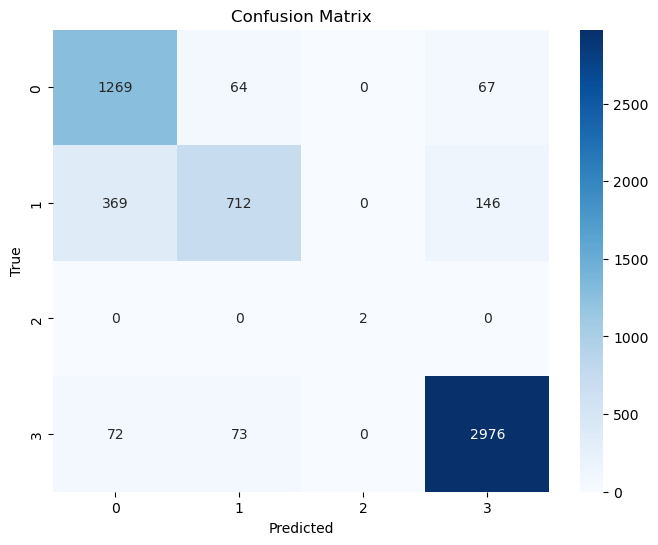

In [94]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, yhat)

# Define class labels if needed
class_labels = [0, 1, 2, 3]  # Replace with your class labels

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()